In [3]:
import numpy as np
import pandas as pd 
import osmnx as ox
import heapq as hq

In [11]:
import networkx as nx
import heapq as hq

# Criação de grafo com 5 nós e 7 arestas
def create_graph():
    G = nx.Graph()
    G.add_node(1, pos=(0, 0))
    G.add_node(2, pos=(1, 0))
    G.add_node(3, pos=(0, 1))
    G.add_node(4, pos=(1, 1))
    G.add_node(5, pos=(2, 1))
    
    # Adicionando arestas com pesos (atributo 'weight')
    edges = [
        (1, 2, 3),
        (1, 3, 7),
        (2, 4, 4),
        (3, 4, 9),
        (4, 5, 2),
        (2, 3, 5),
        (1, 5, 10)
    ]
    
    for u, v, w in edges:
        G.add_edge(u, v, weight=w)
    
    return G

# Algoritmo de Dijkstra com heap
def dijkstra(G, start, end):
    distances = {node: float('inf') for node in G.nodes}
    distances[start] = 0
    path = {node: None for node in G.nodes}
    
    queue = [(0, start)]
    
    while queue:
        current_distance, current_node = hq.heappop(queue)
        
        if current_node == end:
            break
        
        for neighbor in G.neighbors(current_node):
            weight = G[current_node][neighbor]['weight']
            new_distance = current_distance + weight
            
            if new_distance < distances[neighbor]:
                distances[neighbor] = new_distance
                path[neighbor] = current_node
                hq.heappush(queue, (new_distance, neighbor))
    
    return distances, path

# Para reconstruir o caminho:
def reconstruct_path(path, start, end):
    route = []
    current = end
    while current != start:
        route.append(current)
        current = path[current]
    route.append(start)
    route.reverse()
    return route


In [13]:
import matplotlib.pyplot as plt

def plot_graph(G):
    pos = nx.get_node_attributes(G, 'pos')  # Posições dos nós (se existirem)
    
    # Se os nós não tiverem posição definida, gera uma automaticamente
    if not pos:
        pos = nx.spring_layout(G)
    
    plt.figure(figsize=(8, 6))
    
    # Desenha nós e arestas
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=800, font_weight='bold', edge_color='gray')

    # Desenha os pesos das arestas
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    
    plt.title("Grafo com Pesos nas Arestas")
    plt.axis('off')
    plt.show()


Distância mínima: 9
Caminho: [1, 2, 4, 5]


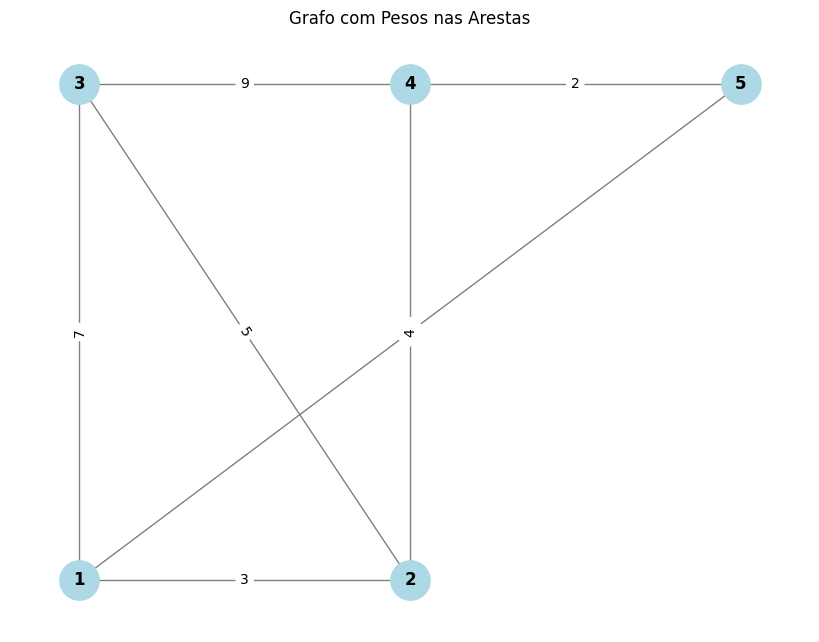

In [15]:
G = create_graph()
distances, path = dijkstra(G, start=1, end=5)
route = reconstruct_path(path, start=1, end=5)

print("Distância mínima:", distances[5])
print("Caminho:", route)
plot_graph(G)
